<a href="https://colab.research.google.com/github/rahul23aug/real_world_projects/blob/main/Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hypothesis test** 

Assumption made: 

Samples are unbiased and representative of the population 

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import scipy.stats as stats
from matplotlib import pyplot as plt
import numpy as np , pandas as pd , seaborn as sns
sns.set()
cols = ['Family ID',	'Fuel Cost']
a = np.arange(1,26).reshape(-1,1)
b = np.array([ 601,  962,  948,  640,  868,  697,  574,  825,  850,  698,  578,
        501, 1066,  716,  532,  645,  595,  467,  580,  710,  797,  723,
        878,  764,  799]).reshape(-1,1)
c = np.concatenate([a,b], axis = 1)
dataset = pd.DataFrame(c)
dataset.columns = cols

In [ ]:
dataset_old = dataset.copy()
dataset_old['Fuel Cost'] = dataset_old['Fuel Cost'] - (dataset['Fuel Cost'].mean() - 310)
dataset_old

,Family ID,Fuel Cost
0,1,190.44
1,2,551.44
2,3,537.44
3,4,229.44
4,5,457.44
5,6,286.44
6,7,163.44
7,8,414.44
8,9,439.44
9,10,287.44


In [ ]:
dataset['Fuel Cost'] = dataset['Fuel Cost'] 
dataset

,Family ID,Fuel Cost
0,1,601
1,2,962
2,3,948
3,4,640
4,5,868
5,6,697
6,7,574
7,8,825
8,9,850
9,10,698


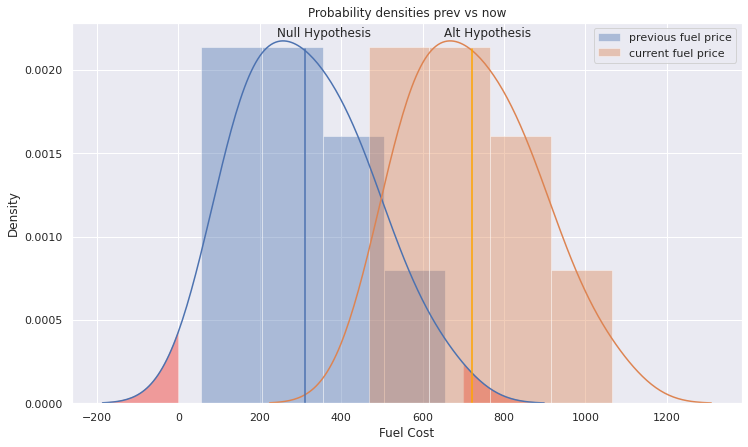

In [ ]:
plt.figure(figsize = (12,7))
ax1 = sns.distplot(dataset_old['Fuel Cost'], label = 'previous fuel price')
kde_x1, kde_y1 = ax1.lines[0].get_data()

ax1.fill_between(kde_x1, kde_y1, where=(kde_x1<0) | (kde_x1>700) , 
                interpolate=True, color='#EF9A9A')
ax2 = sns.distplot(dataset['Fuel Cost'] ,label = 'current fuel price')
kde_x2, kde_y2 = ax2.lines[0].get_data()
plt.axvline(dataset_old['Fuel Cost'].mean(), 0,0.93)
plt.axvline(dataset['Fuel Cost'].mean(), 0,0.93, color = 'orange')
plt.annotate('Null Hypothesis', xy=(dataset_old['Fuel Cost'].mean()-68,0.0022))
plt.annotate('Alt Hypothesis', xy=(dataset['Fuel Cost'].mean()-68,0.0022))
plt.title("Probability densities prev vs now")
plt.legend();

Say the null hypothesis states that there is no change in the mean price of fuel as compared to the previous year

The Alternate hypothesis suggests there is a change to [?]
as seen above random samples are drawn from the population and the distribution for both years is plotted with the means.

The new data shows a sample mean of 720.56 Now hypothesis testing helps with deciding which of the two is true.

given the null hypothesis to be true what is the probability of seeing the current mean value


Assume that multiple samples were drawn for the sake of hypothesis testing

I need to answer the question that if H0 is true then how far from H0 can sampling error fall that is determined by p value.

We reject H0 if p-value is less than alpha (threshold of sorts usually 0.01 or 0.05) else we fail to reject H0

alpha determines the tradeoff between sensitivity and false positive 

lower alpha = higher sensitivity -- higher evidence is needed to reject H0 

high alpha = high false positives -- less evidence needed to reject H0 

Alpha looks at the 2.5%(at 5%)  area on both sides ( outliers ) to check significance

In the figure above -ve values dont make sense so threshold on the left is set to 0 and on the right it is set to an arbitary small value we see that the p-value is < alpha and the sample statistic lies in the critical region thus we reject H0.

**The t test**

Assumptions:
Random sample

continuous data

has > 20 observations

and 
$X \sim \mathcal{N}(\mu,\,\sigma^{2})$

the groups are independant i.e contains distinct examples
if some people or items are repeated consider using paired t test

groups may have equal or unequal variances use correct form of t test

Two forms of t test 
1) Assumes variance of groups is equal
2) Assumes variance of groups is unequal - welch's test

The above distributions have same variance paired t test is the choice

In [ ]:
#test for Normality - Shapiro-Wilk  in cases where this test fails we use Wilcoxon signed-rank Test
W, p = stats.shapiro(dataset_old['Fuel Cost'])
print("set 1: w :{} \np-value: {}".format(W,p))
#test for Normality - Shapiro-Wilk  in cases where this test fails we use Wilcoxon signed-rank Test
W, p = stats.shapiro(dataset['Fuel Cost'])
print("set 2: w :{} \np-value: {}".format(W,p))


set 1: w :0.9746975302696228 
p-value: 0.7642895579338074
set 2: w :0.9746975302696228 
p-value: 0.7642895579338074


the p value is quite high normality assumption is validated

Assume a claim made: The mean of Fuel Prices is assumed to be same as dataset_old. Since we verified assumptions of norality we can proceed to one sample t-test
Doing it manually this time 
H0: The mean is same as previous (no change in mean)
H1: There mean is > prev mean (one tail test )
if it were said not equal we would use two tails test

In [ ]:
from scipy.special import stdtrit #for t-tablle values
def t_test_onesample(sample_new , alpha, known_estimate):
  n = len(sample_new) - 1 # Degrees of Freedom dof = no_of_obs - 1
  S = sample_new.std()/np.sqrt(n)
  Z = sample_new.mean() - known_estimate
  T = Z/S
  t = stdtrit(n, 1 - alpha) #t table value 
  s = T > t
  return [s,t,T]
alpha = 0.05
status , t, T = t_test_onesample(dataset['Fuel Cost'] , alpha, 360) # 95% confidence
if status:
  print('Computed T is > critical t hence it falls in the rejection region hence H0 is rejected!')
  print("We say that the mean is greater than assumed mean with {}% confidence".format((1-alpha)*100))
print("{}".format(t))

Computed T is > critical t hence it falls in the rejection region hence H0 is rejected!
We say that the mean is greater than assumed mean with 95.0% confidence
1.7108820799094275


In [ ]:
#try with higher confidence interval
#If T Statistic is less than the T-critical, it does not fall in the rejection region
alpha = 0.0001
status , t, T = t_test_onesample(dataset['Fuel Cost'] , alpha, 360) # 99.99% confidence
if status:
  print('Computed T statistic is > critical t hence it falls in the rejection region hence H0 is rejected!')
  print("We say that the mean is greater than assumed mean with {}% confidence".format((1-alpha)*100))

Computed T statistic is > critical t hence it falls in the rejection region hence H0 is rejected!
We say that the mean is greater than assumed mean with 99.99% confidence


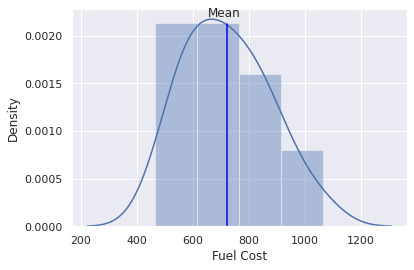

In [ ]:
ax2 = sns.distplot(dataset['Fuel Cost'] ,label = 'current fuel price')
kde_x2, kde_y2 = ax2.lines[0].get_data()
plt.axvline(dataset['Fuel Cost'].mean(), 0,0.93, color = 'blue')
plt.annotate('Mean', xy=(dataset['Fuel Cost'].mean()-68,0.0022));

Another example : 
A School authority has decided to introduce new methods of teaching to see if students perform better, the avg assessment scores before the change are known to be 60.
Random samples after the change were acquired as below

Investigate if the students did etter after the change

In [ ]:
new_scores = np.array([69.11822522, 73.70503322, 83.53963457, 53.11532534, 61.80560212,
       73.9535947 , 50.42908813, 55.79978357, 53.32576331, 49.71272363,
       79.03987933, 73.35564302, 53.46372063, 72.26555032, 59.74323056])
new_scores.std()

10.969135052128093

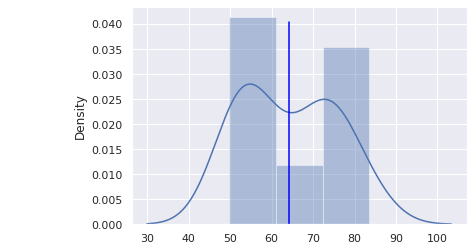

In [ ]:
ax2 = sns.distplot(new_scores ,label = 'current fuel price')
kde_x2, kde_y2 = ax2.lines[0].get_data()
plt.axvline(new_scores.mean(), 0,0.93, color = 'blue')
plt.annotate('Mean', xy=(new_scores.mean()-68,0.030));

In [ ]:
#check for normal distribution
W, p = stats.shapiro(new_scores)
print("set 2: w :{} \np-value: {}".format(W,p))

set 2: w :0.9069749712944031 
p-value: 0.1216939240694046


here p-values > 0.05 so normality assumption holds

In [ ]:
alpha = 0.0001
status , t, T = t_test_onesample(new_scores , alpha, 60) # 99.99% confidence
if status:
  print('Computed T statistic is > critical t hence it falls in the rejection region hence H0 is rejected!')
  print("We say that the mean is greater than assumed mean with {}% confidence".format((1-alpha)*100))
else:
  print('Computed T statistic is < critical we fail to reject  H0 ', T, t)

stats.ttest_1samp(new_scores, 60)

Computed T statistic is < critical we fail to reject  H0  1.4183898002692237 4.985013157719764


Ttest_1sampResult(statistic=1.4183898002692237, pvalue=0.17795265739223673)

Since we failed to reject the null we cant say that the change helped the students

2-Sample T test

Assumes independant groups

Normally distributed (if obs > 15 this can be waived off)

similar variances



Back to the school problem: The autorities want to figure out better of two new mwthods of teaching 

In [ ]:


Method_A = np.array([72.47171449, 72.10054831, 69.70021876, 61.29469083, 76.50973633,
       81.2886421 , 75.89828709, 71.61030277, 82.00560778, 52.74303075,
       64.72014163, 89.80799922, 74.101     , 60.05217322, 68.25017959])
Method_B = np.array([72.14533547, 89.81136212, 98.07199674, 84.48697781, 80.53073819,
       84.8586    , 70.82839411, 90.86379516, 73.11393335, 93.71550056,
       83.39992772, 86.02511572, 92.19116933, 91.87672751, 79.21653421])


In [ ]:
W, p = stats.shapiro(Method_A)
print("set 2: w :{} \np-value: {}".format(W,p))
W, p = stats.shapiro(Method_B)
print("set 2: w :{} \np-value: {}".format(W,p))

set 2: w :0.9877194166183472 
p-value: 0.9977309703826904
set 2: w :0.9511168599128723 
p-value: 0.5422118306159973


In [ ]:
Method_A.std(), Method_B.std()

(9.09463059142385, 8.029320377041154)

not a major difference in std deviations among both groups 

In [ ]:
#using library
from scipy.stats import ttest_ind
from scipy.stats import t
alpha = 0.01 
ttest_ind( Method_A,Method_B, equal_var=True) , 'p-value < alpha thus we reject the null hypothesis here we see tha mean of B > A from t statistic'

(Ttest_indResult(statistic=-4.083048124398022, pvalue=0.00033619096524951366),
 'p-value < alpha thus we reject the null hypothesis here we see tha mean of B > A from t statistic')

In [ ]:
#a = pd.read_csv('/content/T-testData.csv')



Paired t test when the same entities form tye samples
eg drug efficacy

In [ ]:
b = np.array([-1.43232852, -1.43952451, -0.87813076,  2.0461788 , -0.06234318,
        0.83784858,  0.60482131,  1.64801646,  0.25099605, -0.3990805 ,
       -1.94518941,  0.15781223, -1.59428156,  0.47871494,  1.76438468]).reshape(-1,1)
c = np.array([ 1.00369028,  1.62506892, -0.07925225,  0.47961567,  1.20516793,
        1.33710324,  2.55501814,  1.22169639, -0.22137644,  1.4641668 ,
        1.72629738,  0.72569   ,  0.31324619,  1.5731259 ,  0.03464423]).reshape(-1,1)
d = np.array([-2.4360188 , -3.06459343, -0.79887852,  1.56656313, -1.26751111,
       -0.49925466, -1.95019683,  0.42632007,  0.47237249, -1.86324731,
       -3.67148679, -0.56787777, -1.90752775, -1.09441096,  1.72974045]).reshape(-1,1)
testdata = pd.DataFrame(np.concatenate([b,c,d], axis = 1))
testdata.columns = ['Before', 'After', 'Difference']
testdata

,Before,After,Difference
0,-1.432329,1.003690,-2.436019
1,-1.439525,1.625069,-3.064593
2,-0.878131,-0.079252,-0.798879
3,2.046179,0.479616,1.566563
4,-0.062343,1.205168,-1.267511
5,0.837849,1.337103,-0.499255
6,0.604821,2.555018,-1.950197
7,1.648016,1.221696,0.426320
8,0.250996,-0.221376,0.472372
9,-0.399081,1.464167,-1.863247


In [ ]:
stats.ttest_rel(testdata['Before'],testdata['After'])

Ttest_relResult(statistic=-2.4467838079517152, pvalue=0.028217866876897695)

Clearly there is a statistically significant diff in mean

**Calculating Confidence Intervals**

The normal Distribution

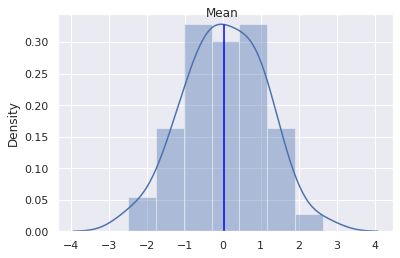

In [ ]:
np.random.seed(6)
x = np.random.randn(50,1)
ax2 = sns.distplot(x ,label = 'Probality distribution of N')
kde_x2, kde_y2 = ax2.lines[0].get_data()
plt.axvline(x.mean(), 0,0.95, color = 'blue')
plt.annotate('Mean', xy=(x.mean()-0.5,0.34));

underlying distribution has mean in the interval (-0.19710259338124525,0.28887570351349984) with 95.0% confidence





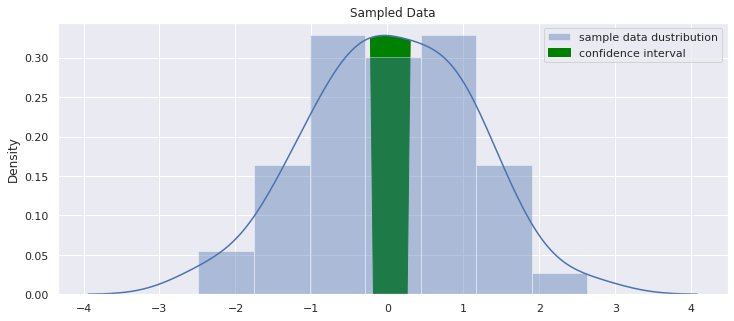

In [ ]:
#calculating z score of normal ditribution which is nothing but P(sample_observation >= z-score) = proibability
#it also gives 1-pth quantile so if  p = 0.05 we get the 0.95th or the range 
#stats.norm.ppf(1-0.025)
# lets say we want to find the bounds of mean of the hidden distribution which is given by N(0,1)[unknown to us] with 98% confidence
confidence = 0.95
def get_mean_confidence_interval_normal(x, confidence = 0.95, plot_figure = True): # save
  '''ensure you check your data for normality assumption'''
  lb = x.mean() - (stats.norm.ppf(confidence) * (x.std()/np.sqrt(len(x))))  #norm.ppf gets z value
  ub = x.mean() + (stats.norm.ppf(confidence) * (x.std()/np.sqrt(len(x))))
  plt.figure(figsize=(12,5))
  ax1 = sns.distplot(x, label = 'sample data dustribution')
  kde_x1, kde_y1 = ax1.lines[0].get_data()
  ax1.fill_between(kde_x1, kde_y1, where=(kde_x1>lb) & (kde_x1<ub) , 
                interpolate=True, color='green', label = 'confidence interval');
  _ = plt.title('Sampled Data')
  plt.legend();
  return lb,ub, confidence
lb,ub, confidence = get_mean_confidence_interval_normal(x, confidence, plot_figure = True)
print('underlying distribution has mean in the interval ({},{}) with {}% confidence\n\n\n'.format(lb,ub, confidence *100))


As seen the true mean / population mean 0 is included in the interval

visualizing the interval by changing cofidence value so lower confidence value = narrower bounds and vice versa

underlying distribution has mean in the interval (-0.011035647905360338,0.10280875803761493) with 65.0% confidence




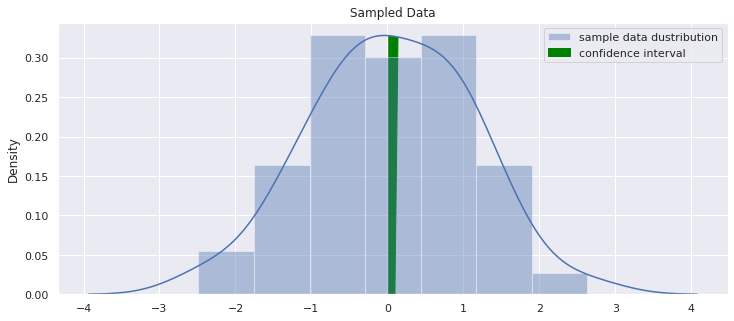

In [ ]:
confidence = 0.65
lb,ub, confidence = get_mean_confidence_interval_normal(x, confidence, plot_figure = True)
print('underlying distribution has mean in the interval ({},{}) with {}% confidence\n\n'.format(lb,ub, confidence *100))


underlying distribution has mean in the interval (-0.41062392360300637,0.5023970337352609) with 99.9% confidence




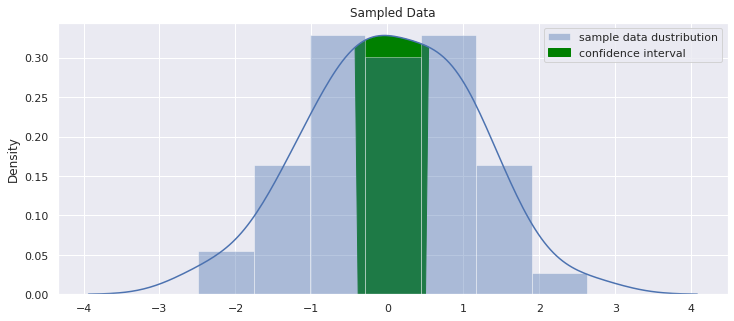

In [ ]:
confidence = 0.999
lb,ub, confidence = get_mean_confidence_interval_normal(x, confidence, plot_figure = True)
print('underlying distribution has mean in the interval ({},{}) with {}% confidence\n\n'.format(lb,ub, confidence *100))

understanding critical z value in simpler terms:
assume we want to know the probability of seeing a datapoint of value Z given that the data is normally distributed 
P(Z>= critical ) = p


In [ ]:
# save
def area_under_curve(x, h):
  '''Uses Simpson's 1/3rd rule to calculate AuC'''
  i = 1
  total = x[0] + x[-1]
  for j in x[1:-1]:
    if j%2 == 0:
      total += 2*j
    else:
      total += 4*j
    i+=1
  return total * (h/3)

def get_z_viz_normal(x, z):
  '''ensure you check your data for normality assumption'''
  plt.figure(figsize=(12,5))
  ax1 = sns.distplot(x, label = 'sample data dustribution')
  kde_x1, kde_y1 = ax1.lines[0].get_data()
  ax1.fill_between(kde_x1, kde_y1, where=(kde_x1<=z), 
                interpolate=True, color='orange', label = 'less than z');
  ax1.fill_between(kde_x1, kde_y1, where=(kde_x1>z), 
                interpolate=True, color='grey', label = 'greater than z');
  _ = plt.title('Sampled Data Distribution')
  plt.legend();
  y = kde_y1[kde_x1<= z]
  plt.annotate('P(Z <= {} ) = {:.3F}'.format(z, area_under_curve(y, 0.03)), xy=(-4,0.25));
  plt.annotate('P(Z > {} ) = {:.3F}'.format(z, 1- area_under_curve(y, 0.03)), xy=(1.5,0.25));
  #print('Probability of seeing a sample < than {} :{} \t\t < than z:{}  '.format(z,area_under_curve(y, 0.03),1-area_under_curve(y, 0.03) ))
  

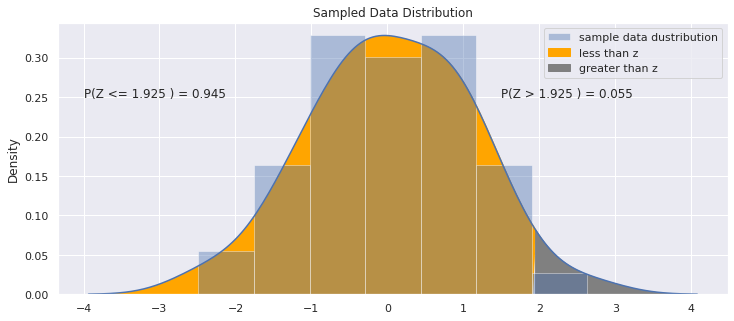

In [ ]:
get_z_viz_normal(x, 1.925)

TYPES of ERRORS  and Statistical Power

TYPE - 1 - Reject the null when it is true . Also called false Positive. the test detects a false significance due to sample error, large sample size(making the test sensitive thereby detecting smaller effects which are meaningless or impractical).

The rate of occurence of Type-1 error is equal to alpha value (level of significance) because it is the probability of seeing data that causes us to reject the null

TYPE - 2 - False Negative the test fails to detect a significance due to sample size or low variance in sample

TYPE-2 error occurance rate is called $\beta$ it cannot be estimated like type 1 error but 1 -  $\beta$ is called Power and high power = high sensitivity to detect smaller changes

One may choose which error is better based on the situation 
eg: False Positive (TYPE-1) is preffered than false negative while detecting flaws in a nuclear waste containment vessel

While  False Negative is preffered when testing the hypothesis that a vessel is strong enough to take damage from wear and tear.




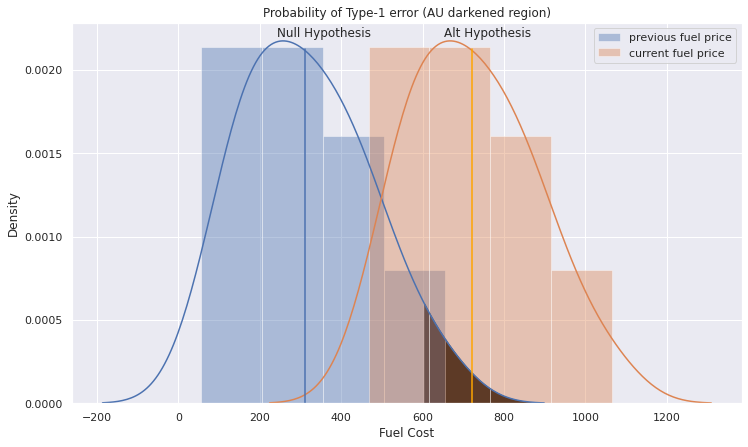

In [ ]:
plt.figure(figsize = (12,7))
ax1 = sns.distplot(dataset_old['Fuel Cost'], label = 'previous fuel price')
kde_x1, kde_y1 = ax1.lines[0].get_data()

ax1.fill_between(kde_x1, kde_y1, where= kde_x1>600 , 
                interpolate=True, color='#090909')
ax2 = sns.distplot(dataset['Fuel Cost'] ,label = 'current fuel price')
kde_x2, kde_y2 = ax2.lines[0].get_data()
#ax2.fill_between(kde_x2, kde_y2, where= (kde_x2<=600)  , interpolate=True, color='#48403F')
plt.axvline(dataset_old['Fuel Cost'].mean(), 0,0.93)
plt.axvline(dataset['Fuel Cost'].mean(), 0,0.93, color = 'orange')
plt.annotate('Null Hypothesis', xy=(dataset_old['Fuel Cost'].mean()-68,0.0022))
plt.annotate('Alt Hypothesis', xy=(dataset['Fuel Cost'].mean()-68,0.0022))
plt.title("Probability of Type-1 error (AU darkened region)")
plt.legend();

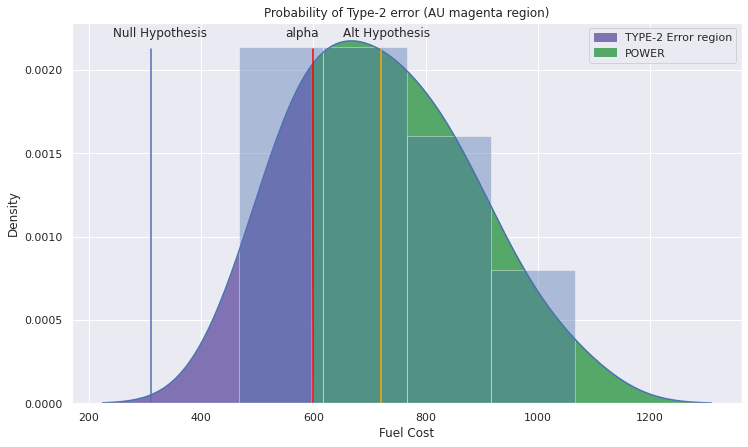

In [ ]:
plt.figure(figsize = (12,7))
#ax1 = sns.distplot(dataset_old['Fuel Cost'], label = 'previous fuel price')
kde_x1, kde_y1 = ax1.lines[0].get_data()

#ax1.fill_between(kde_x1, kde_y1, where= kde_x1>600 , interpolate=True, color='#48403F')
ax2 = sns.distplot(dataset['Fuel Cost'] )
kde_x2, kde_y2 = ax2.lines[0].get_data()
ax2.fill_between(kde_x2, kde_y2, where= (kde_x2<=600)  , interpolate=True, color='m',label = 'TYPE-2 Error region')
ax2.fill_between(kde_x2, kde_y2, where= (kde_x2>600)  , interpolate=True, color='g',label = 'POWER')
plt.axvline(dataset_old['Fuel Cost'].mean(), 0,0.93)
plt.axvline(dataset['Fuel Cost'].mean(), 0,0.93, color = 'orange')
plt.annotate('Null Hypothesis', xy=(dataset_old['Fuel Cost'].mean()-68,0.0022))
plt.axvline(600, 0,0.93, color = 'red')
plt.annotate('alpha', xy=(600-50,0.0022))
plt.annotate('Alt Hypothesis', xy=(dataset['Fuel Cost'].mean()-68,0.0022))
plt.title("Probability of Type-2 error (AU magenta region)")
plt.legend();

**2-Sample t-test Power Analysis for Sample size**

As seen the size of the sample determines the power of the test consequently the sensitivity of the test 

Collection of sample data costs resources and collecting a huge number of sample to get a meaningless effect is just a plain waste of resources 

Contrarily, getting few samples may fail to detect an actual effect

so this balance (and indirectly the balance between type-1 and type-2 error) is governed by power analysis which takes into account the sample size, effect size and data variability.

using statsmodel.stats.power.tt_ind_solve_power
this module will solve for any one value given the rest are provided

Effect_size: also called difference is the smallest difference between the two groups the you choose so as the result is meaningful / std deviation.
eg the minimum difference between the means of two groups must be x so as to cinsider it meaningful.

nobs1: number of observations

alpha: the significance

power: desired statitical power



In [ ]:
import statsmodels.stats.power as sp
#Use standardized effect size below = effect / std dev
sp.tt_ind_solve_power(effect_size=1.25, nobs1=None, alpha=0.04825, power=0.91, ratio=1.0, alternative='two-sided')

15.118719903512062

As seen above in order to detect a difference or effect of 0.5 with alpha as 0.05 and chance of 90% we need 85 samples in each group so a total of 170 samples

**Plot Power Curves**

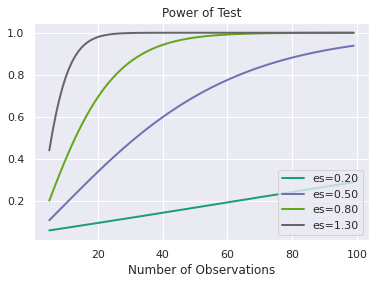

In [ ]:
# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = sp.TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

one thing to note is that any test regardless of power will have a positive bias to the effect and so they over-estimate the mean in comparison since only significant results are considered.

for a test with 30% power a significantly large evidence (effect is required to reject the null) ie the bias 

while one with 80% power still has a bias but a much more manageable one since the test is more sensitive

1 tail vs 2 tail tests:

The tail refers to the critical region.
When using  1 tail test we have one critical region and the null states either of:
- the effect(difference) is <=0 (will ignore large negative values)
or
- the effect(difference) is >=0  (will ignore large positive values)
the C.I here has only only one bound is higher or lower depending on null


1 tails vs 2 tails

1 tail test:

Done when we care of effects in one direction only. greater power as compared to 2 tail test of same significance level.

However it is better at times (based on how much false positive rate is acceptable) to use a 2 tail test with high significance value 




# **Comparing means of three or more groups - ANOVA test**

Anova can be used to compare two group mean but usually we use 2-sample-t-test

Anova tests require one categorical variable called factors that divide the data into groups these groups contain continuous data.

Assumptions made:

1) Random Samples

2) Independant Groups

3) Normally distributed [for 2-9 groups if datapoints >=15 for each group this assumption can be waived off  for 10 -12 groups datapoints must be >=r20] 

4) Equal variances : The standard F-test form of one way ANOVA test assumes tha variance among each population is equal, if not then use Welch's ANOVA which does not make this assumption.


The standard hypothesis for one-way ANOVA


*   Null: All group means are equal
*   Alt: Not all group means are equal

Independant variable - categorical

Dependant variable - continuous



In [ ]:
#Exercise: Using ANOVA to compare strength of raw materials from suppliers 
A= np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])
B = np.array([11.71550105, 11.98156908,  8.04392916, 10.55816044, 14.07946306,
       10.7768675 ,  7.86026951, 11.88967173, 11.94231429, 13.17745445,
       10.56615483, 13.45535856,  7.41884046, 12.03131356,  7.77663322,
       10.74893904, 10.7269804 ,  4.47729137,  6.80382036,  5.37189215,
       10.28334624, 12.17773217, 10.55980776,  9.65518653,  8.79027484,
       10.86245666, 10.37818381, 10.18805153, 11.62452005, 12.30590475,
        6.90348603,  8.99011032,  6.97127345,  9.16038962,  8.67842635,
       11.44383167, 10.78044122,  5.66675998, 10.77604071,  9.00876494])
data = pd.DataFrame([])
data['Sample'] = A
data['Strength'] = B
data
df = pd.DataFrame([])
for i in data['Sample'].unique():
  df =pd.concat([df,pd.DataFrame(data['Strength'][data['Sample']==i].values)],axis= 1 )
df.columns = ['Supplier ' + str(i) for i in data['Sample'].unique()]
df

,Supplier 1,Supplier 2,Supplier 3,Supplier 4
0,11.715501,10.566155,10.283346,6.903486
1,11.981569,13.455359,12.177732,8.990110
2,8.043929,7.418840,10.559808,6.971273
3,10.558160,12.031314,9.655187,9.160390
4,14.079463,7.776633,8.790275,8.678426
5,10.776867,10.748939,10.862457,11.443832
6,7.860270,10.726980,10.378184,10.780441
7,11.889672,4.477291,10.188052,5.666760
8,11.942314,6.803820,11.624520,10.776041
9,13.177454,5.371892,12.305905,9.008765


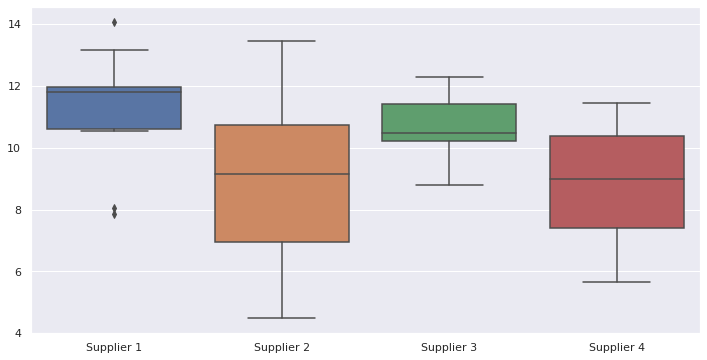

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df)



Performing anova

In [ ]:
!pip install pingouin
import pingouin as pg

aov = pg.anova(data=data, dv='Strength', between='Sample', detailed=True)
print(aov)

     |████████████████████████████████| 205 kB 5.0 MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-py3-none-any.whl size=204754 sha256=8eadb23e3a348d60631621bcbead442017ccd5b5409f729064f867a74bd51a8e
  Stored in directory: /root/.cache/pip/wheels/5b/8a/ed/fafe2714a0f047d64fb582105b174b5e5218c82a0d787bbec4
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=7a906b0ae3c31384f886f977022efd52bbaea62b68e8fccd6d670ee6a28b5496
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
   Source          SS  DF         MS         F     p-unc       np2
0  Sample   43.619382   3  14.539794  3.303123  0.031054  0.215846
1  Within  158.465978  36   4.401833       NaN       NaN       NaN


POST hoc tests 

In [ ]:
pt = pg.pairwise_tukey(dv='Strength', between='Sample', data=data)
print(pt)

   A  B    mean(A)    mean(B)      diff        se         T   p-tukey    hedges
0  1  2  11.202520   8.937722  2.264798  0.938279  2.413780  0.092450  1.033863
1  1  3  11.202520  10.682546  0.519974  0.938279  0.554178  0.900000  0.237364
2  1  4  11.202520   8.837952  2.364568  0.938279  2.520113  0.073743  1.079408
3  2  3   8.937722  10.682546 -1.744824  0.938279 -1.859601  0.263336 -0.796499
4  2  4   8.937722   8.837952  0.099770  0.938279  0.106333  0.900000  0.045544
5  3  4  10.682546   8.837952  1.844594  0.938279  1.965934  0.219819  0.842044


Interpretting the trest

ANOVA - 

SS - Sum of Squares 

DF - Degrees of freedom [sample size - 1 = 39] 3 indicates no. of cols 36 is the error or 39 -3

MS - Mean squares =  ssum of squared distances from global mean(mean of alll 40 datapoints) / DoF

F - F-Statistic

p-unc - p-value

np2 - Effect size

we see that p-value < 0.05 so the null is rejected.


Pair-wise Means table

We see a highest mean of 11.202 for supplier 1  while a lowest of 8.837 for supplier 4

ANOVA uses F-test under the hood diving more deeply in it

F-stat = between group variance / in group variance 

low F values favours null

Just as t tests use t distribution F tests use F distribution

0.9548911520664681